# Визуализация астрономических данных (matplotlib)

## Импорт пакетов

In [1]:
import matplotlib
import matplotlib as mpl
import astropy
import astropy.io.fits as fits

print(matplotlib.__version__)
print(astropy.__version__)

3.7.1
5.3.4


In [2]:
%matplotlib inline

In [3]:
print(mpl.get_backend())

module://matplotlib_inline.backend_inline


In [4]:
%whos

Variable     Type      Data/Info
--------------------------------
astropy      module    <module 'astropy' from '/<...>ges/astropy/__init__.py'>
fits         module    <module 'astropy.io.fits'<...>opy/io/fits/__init__.py'>
matplotlib   module    <module 'matplotlib' from<...>/matplotlib/__init__.py'>
mpl          module    <module 'matplotlib' from<...>/matplotlib/__init__.py'>


In [5]:
import numpy as np
import matplotlib.pyplot as plt
mpl.style.use("default")

## Что такое Matplotlib?

Библиотека для создания статических, анимированных и интерактивных визуализаций (графиков) в Python.

Сайт: https://matplotlib.org

## Возможности
* Создание качественных 2D или 3D изображений (графиков) для публикаций
* Объектно-ориентированный программный интерфейс (API)
* Создание интерактивных визуализаций
* Большие возможности по настройке отображения
* Поддержка разных выходных форматов: PNG, PDF, SVG...
* Поддержка объектов numpy
* Интеграция с Jyputer, возможность встраивания в GUI приложения на Python
* Есть пакеты, расширяющие matplotlib (https://matplotlib.org/mpl-third-party/)

## Виды изображений

__По способу хранения и представления:__
* Растровые изображения (матрица пикселей)
* Векторные изображения (аналитическое или алгоритмическое задание изображения)

__По отображаемым размерностям:__
* 2D (отображение двухмерных объектов)
* 3D (отображение трехмерных объектов на двумерной плоскости)

__По используемой системе координат:__
* Декартовы координаты
* Полярные координаты

## Бакенды

__Требование:__ Требуется выводить графики в разные форматы (pdf, png, svg, eps, интерактивное окно)

__Реализация:__
Реализованы различные способы вывода изображения - Бакенды (Backends). В свою очередь, под Фронтендом (Fontend) подразумевается программный код на python, который задает на высоком уровне, как должно быть отрисовано изображение. Бакенд выполняет всю черновую работу "под капотом".

__Виды Бакендов:__
* Interactive backends (PyQt/PySide, PYGObject, Tkinter, wxPython, ...)
* Hardcopy (non-interactive) backends (PNG, SVG, PDF, PS, ...)

### Схема работы Matplotlib

![Image](matplotlib.pic.1.svg)

### Как выбрать Бакенд
* rcParams["backend"]
* параметр в конфигурационном файле matplotlibrc
* Переменная окружения MPLBACKEND
* Функция matplotlib.use()

### Список доступных Бакендов

In [6]:
print("Интерактивные Бакенды:")
for b in matplotlib.rcsetup.interactive_bk: print(f"\t{b}")

print("Неинтерактивные Бакенды:")
for b in matplotlib.rcsetup.non_interactive_bk: print(f"\t{b}")

#matplotlib.rcsetup.all_backends

Интерактивные Бакенды:
	GTK3Agg
	GTK3Cairo
	GTK4Agg
	GTK4Cairo
	MacOSX
	nbAgg
	QtAgg
	QtCairo
	Qt5Agg
	Qt5Cairo
	TkAgg
	TkCairo
	WebAgg
	WX
	WXAgg
	WXCairo
Неинтерактивные Бакенды:
	agg
	cairo
	pdf
	pgf
	ps
	svg
	template


## Пример: Интерактивное отображение

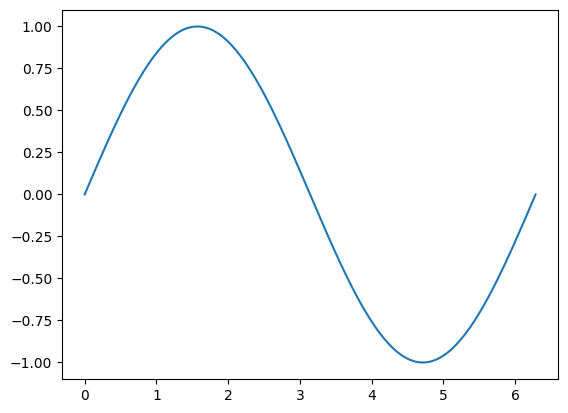

In [38]:
x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x)
plt.plot(x, y);
#plt.show()

## Пример: Печатное отображение

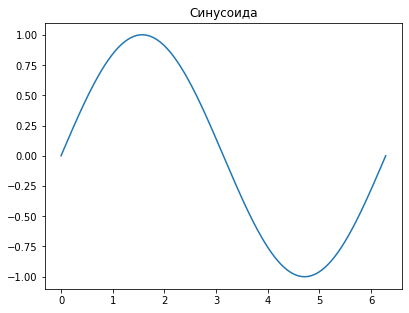

In [40]:
matplotlib.use("pdf")
plt.title("Синусоида")
plt.plot(x, y)
plt.savefig("matplotlib_example_1.pdf");

## Интерфейсы

__Процедурный (implicit) интерфейс:__
* matplotlib.pyplot.plot(...)
* Интерфейс, основанный на сохранении текущего состояния
* Схожий с MATLAB подход к отрисовке
* Рекомендуется для интерактивной отрисовки

__Объектно-ориентированный (explicit, Axes) интерфейс:__
* Рекомендуется для сложной отрисовки
* Объектная модель картины
* pyplot.figure, pyplot.subplots, pyplot.subplot_mosaic, ...

## Процедурный (implicit) интерфейс

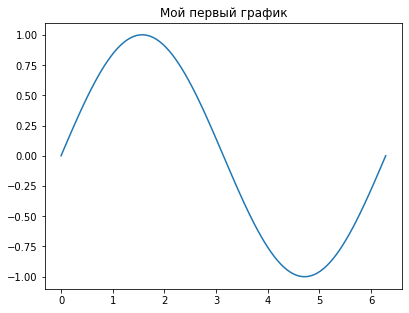

In [9]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)
plt.title("Мой первый график")
plt.plot(x, y);

## Объектно-ориентированный (explicit, Axes) интерфейс

Работа с объектной моделью. Это позволяет декомпозировать достаточно объемный интерфейс по объектам, упростить реализацию интерфейса.

Figure
* Axes (одна и более)
    * Title
    * Axis (как правило, две: xaxis, yaxis)
        * Scale
        * Ticks (Locator, Formatter)
    * Grid 
    * Legend
    * Объекты отрисовки (Line2D)
* Colorbar 

![Image](matplotlib.pic.2.png)

### Figure

* Область, на которой отображаются все графические компоненты визуализации
* Данные отображаются на Figure (базовый класс Artist)

Свойства фигуры:
* figsize (в дюймах)
* facecolor (цвет области, занятой фигурой)
* layout
* dpi (к-во точек на дюйм)
* edgecolor (цвет границы)
* frameon

In [47]:
fig = plt.figure(figsize = (10, 6), facecolor = "lightblue")
#git.show()

<Figure size 1000x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

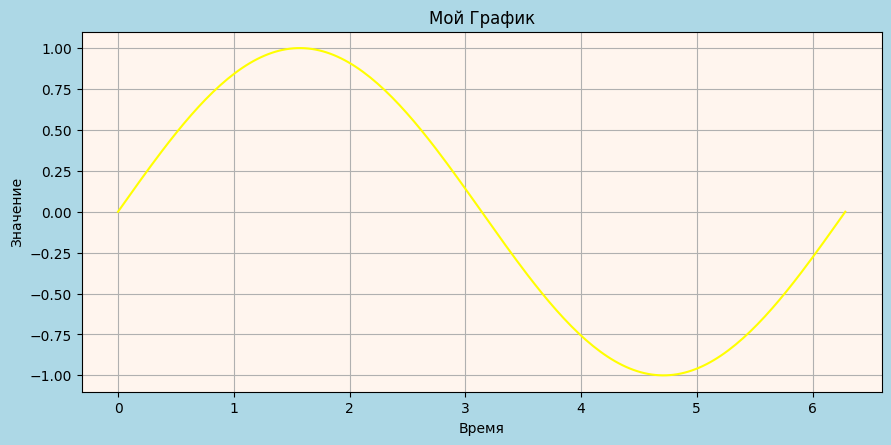

In [56]:
plt.clf()

fig = plt.figure(figsize = (10, 6), facecolor = "lightblue")

ax = fig.add_axes(rect = [0.1, 0.1, 0.8, 0.6])

ax.set_facecolor("seashell")
ax.set_title("Мой График")
ax.set_xlabel("Время")
ax.set_ylabel("Значение")
ax.grid(True)

g = ax.plot(x, y, color="yellow");

### Axes

<Figure size 640x480 with 0 Axes>

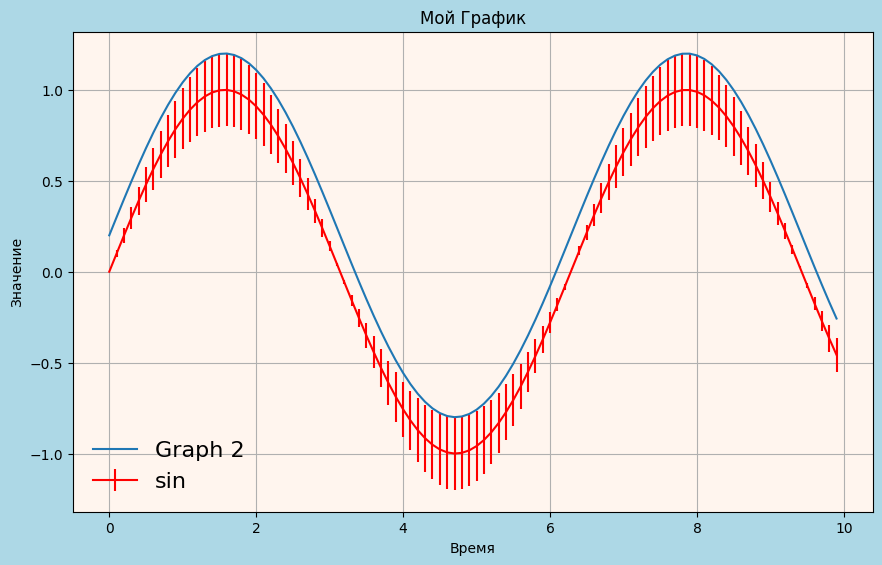

In [69]:
x = np.arange(0, 10, 0.1)
y = np.sin(x)
#yerr = np.linspace(0.1, 0.5, 100)
yerr = 0.2 * np.fabs(y)

plt.clf()

fig = plt.figure(figsize = (10, 6), facecolor = "lightblue")

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.set_facecolor("seashell")
ax.set_title("Мой График")
ax.set_xlabel("Время")
ax.set_ylabel("Значение")
#ax.set_xlim(2, 3)
#ax.set_ylim(0.1, 1.0)
ax.grid(True)

g = ax.errorbar(x, y, yerr = yerr, color="red", label="sin")
g2 = ax.plot(x, y + 0.2, label = "Graph 2")
#g = ax.errorbar(x, y, yerr = yerr, color="red", uplims = True, lolims = True)

o = ax.legend(loc = "lower left", fontsize = 16, frameon = False)

## Виды графиков

* https://matplotlib.org/stable/plot_types/index.html

### plot

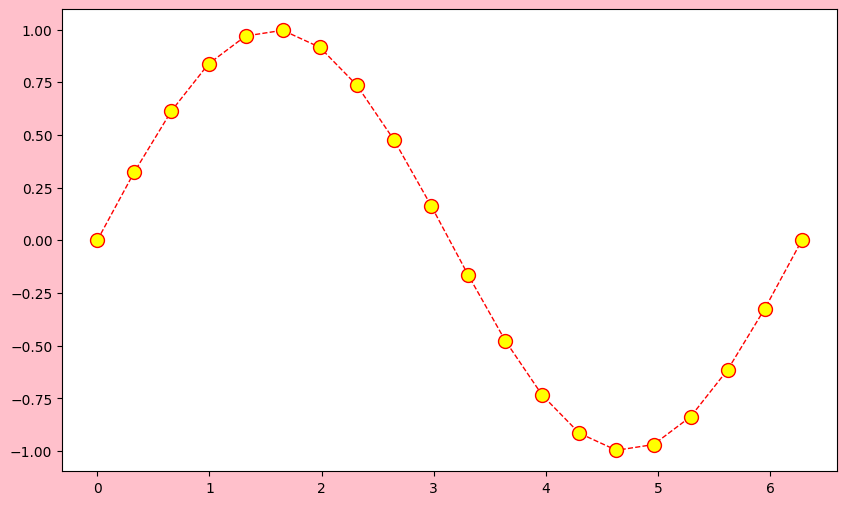

In [74]:
x = np.linspace(0, 2*np.pi, 20)
y = np.sin(x)
fig, ax = plt.subplots(figsize = (10, 6), facecolor = "pink")
ax.plot(x, y, color = "red",
        linestyle = "--",
        linewidth = 1,
        marker="o",
        markersize = 10, 
        markerfacecolor = "yellow");

In [14]:
### errorbar

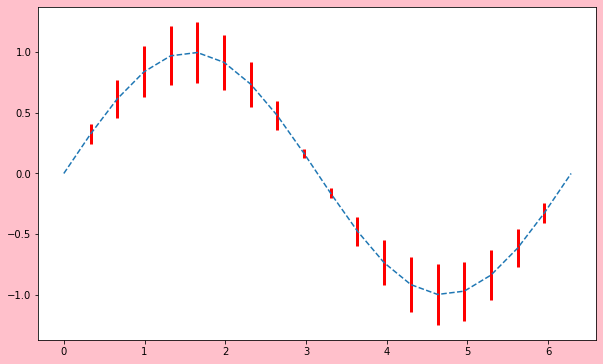

In [15]:
x = np.linspace(0, 2*np.pi, 20)
y = np.sin(x)
fig, ax = plt.subplots(figsize = (10, 6), facecolor = "pink")
ax.errorbar(x, y, yerr = np.abs(y) / 4, fmt = "--",
            ecolor = "red",
            elinewidth = 3
           );

### scatter

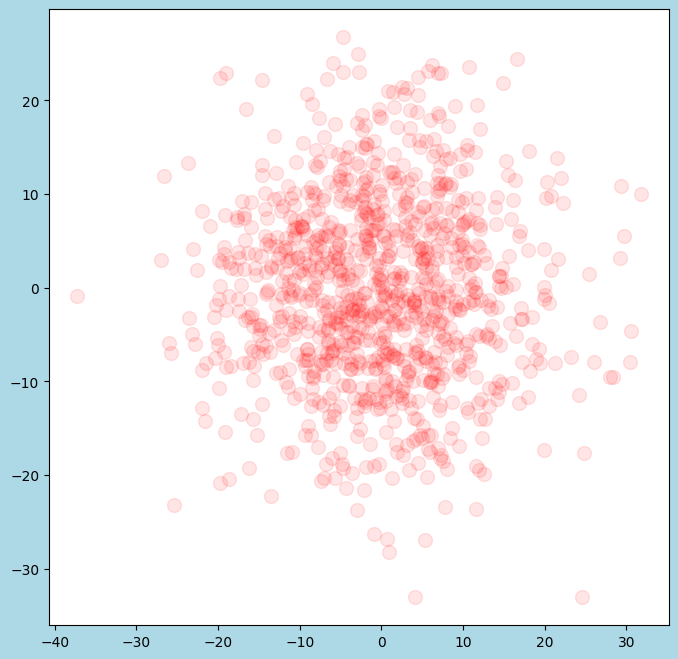

In [81]:
data = np.random.normal(loc = 0, scale = 10.0, size = (1000, 1000))
s = np.linspace(10, 100, 100)
fig, ax = plt.subplots(figsize = (8, 8), facecolor = "lightblue")
ax.scatter(data[0], data[1], alpha = 0.1, color = "red", s = 100, marker = 'o');

### contour

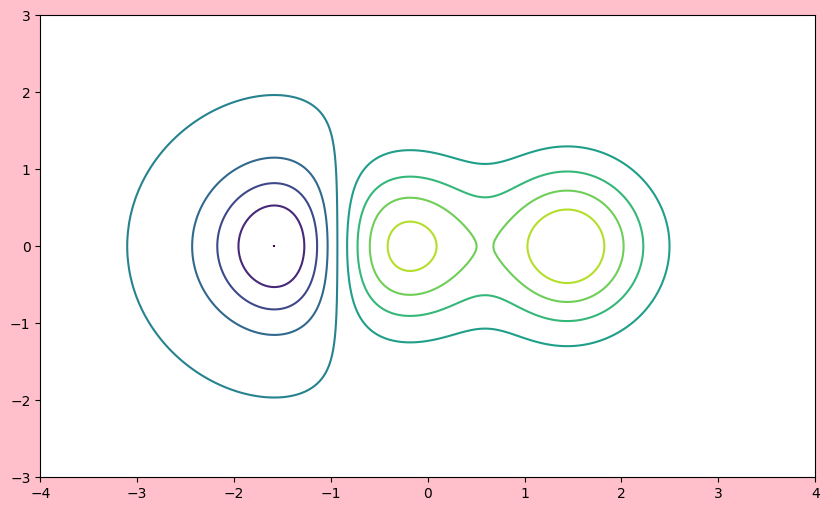

In [86]:
x, y = np.meshgrid(np.linspace(-4, 4, 256), np.linspace(-3, 3, 256))
z = (1 - x/2 + x**5 + x**3) * np.exp(-x**2 - y**2)
levels = np.linspace(np.min(z), np.max(z), 10)

fig, ax = plt.subplots(figsize = (10, 6), facecolor = "pink")
#ax.set(xlim = (-5, 5), ylim = (-5, 5))
ax.contour(x, y, z, levels=levels);

### imshow

* Используются карты цветов

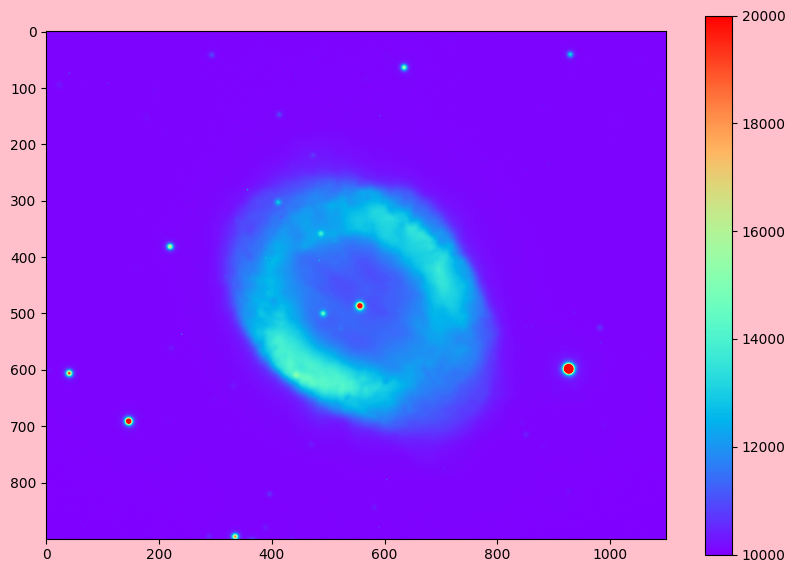

In [94]:
d = fits.open("data/M57/Group1-B.fit")
data = d[0].data[700:1600, 600:1700]

plt.style.use("default")
fig = plt.figure(figsize=(10, 7), facecolor="pink", edgecolor="red")
ax = fig.subplots()
ax.grid(False)
img = ax.imshow(data, vmin = 10000, vmax = 20000, cmap = "rainbow");
fig.colorbar(img, ax = ax);

In [19]:
print(" ... ".join(mpl.colormaps()))

magma ... inferno ... plasma ... viridis ... cividis ... twilight ... twilight_shifted ... turbo ... Blues ... BrBG ... BuGn ... BuPu ... CMRmap ... GnBu ... Greens ... Greys ... OrRd ... Oranges ... PRGn ... PiYG ... PuBu ... PuBuGn ... PuOr ... PuRd ... Purples ... RdBu ... RdGy ... RdPu ... RdYlBu ... RdYlGn ... Reds ... Spectral ... Wistia ... YlGn ... YlGnBu ... YlOrBr ... YlOrRd ... afmhot ... autumn ... binary ... bone ... brg ... bwr ... cool ... coolwarm ... copper ... cubehelix ... flag ... gist_earth ... gist_gray ... gist_heat ... gist_ncar ... gist_rainbow ... gist_stern ... gist_yarg ... gnuplot ... gnuplot2 ... gray ... hot ... hsv ... jet ... nipy_spectral ... ocean ... pink ... prism ... rainbow ... seismic ... spring ... summer ... terrain ... winter ... Accent ... Dark2 ... Paired ... Pastel1 ... Pastel2 ... Set1 ... Set2 ... Set3 ... tab10 ... tab20 ... tab20b ... tab20c ... magma_r ... inferno_r ... plasma_r ... viridis_r ... cividis_r ... twilight_r ... twilight_s

## Размещение (Layout)

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html

* plt.figure()
* plt.subplots()
* plt.subplot_mosaic()

The layout mechanism for positioning of plot elements to avoid overlapping Axes decorations (labels, ticks, etc). Note that layout managers can measurably slow down figure display.

Встроенные типы рамещений:

* 'constrained': The constrained layout solver adjusts axes sizes to avoid overlapping axes decorations. Can handle complex plot layouts and colorbars, and is thus recommended. See Constrained Layout Guide for examples.

* 'compressed': uses the same algorithm as 'constrained', but removes extra space between fixed-aspect-ratio Axes. Best for simple grids of axes.

* 'tight': Use the tight layout mechanism. This is a relatively simple algorithm that adjusts the subplot parameters so that decorations do not overlap. See Figure.set_tight_layout for further details.

* 'none': Do not use a layout engine.

A LayoutEngine instance. Builtin layout classes are ConstrainedLayoutEngine and TightLayoutEngine, more easily accessible by 'constrained' and 'tight'. Passing an instance allows third parties to provide their own layout engine.

If not given, fall back to using the parameters tight_layout and constrained_layout, including their config defaults rcParams["figure.autolayout"] (default: False) and rcParams["figure.constrained_layout.use"] (default: False).

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


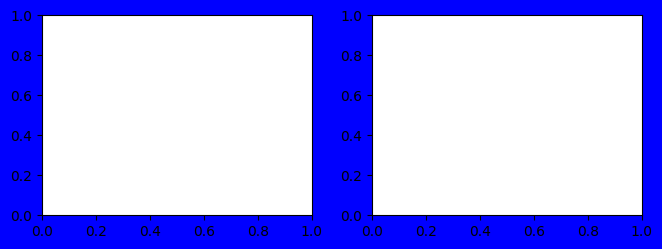

In [95]:
fig = plt.figure(figsize=(6, 2), layout = "constrained", facecolor = "blue")
ax1 = fig.add_axes(rect = [0, 0, 0.45, 1])
ax2 = fig.add_axes(rect = [0.55, 0, 0.45, 1]);

## Шрифты

In [100]:
import matplotlib as mpl
la = mpl.font_manager.FontManager()
lu = mpl.font_manager.FontProperties(family = 'Courier New')
print(lu)
#for fnt in la.ttflist:
#    print(fnt)

Courier New:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0


### Рендеринг latex шрифтов


sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super

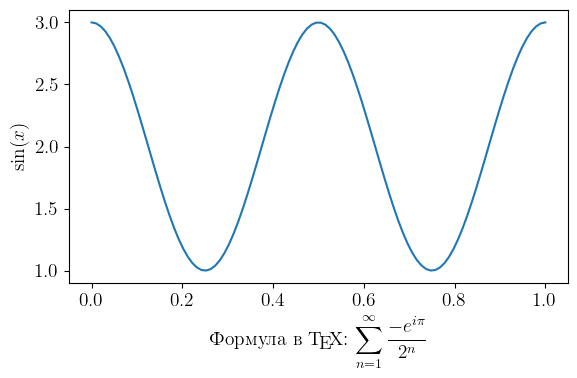

In [102]:
from matplotlib import rc

plt.style.use("default")

rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size' : 14})
rc('text', usetex = True)
rc('text.latex', preamble = r'\usepackage[utf8]{inputenc}')
rc('text.latex', preamble = r'\usepackage[russian]{babel}')

t = np.linspace(0.0, 1.0, 100)
s = np.cos(4 * np.pi * t) + 2

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(t, s)

ax.set_xlabel(r'Формула в \TeX : $\displaystyle \sum_{n=1}^\infty\frac{-e^{i\pi}}{2^n} $')
ax.set_ylabel(r'$\sin(x)$');

## Настройка внешнего вида

### Единицы измерения
* Размеры задаются в дюймах (inch, 2.54 см)
* Размер шрифтов в points (1/72 дюйма)
* Плотность точек в напечатанном изображении (DPI - Dots Per Inch)
* Плотность пикселей в растре (PPI - Pixels Per Inch)
* Ширина линии (в points, 1/72 дюйма)

### Способы задания внешнего вида
* Задание rcParams в рантайме
* Стили (rcParams, записанные в файл, предустановленные стили)
* Конфигурационный файл matplotlibrc
* С использованием программных интерфейсов (функций, объектов)
* Переменные окружения (MPLBACKEND)

In [103]:
for par in list(filter(lambda x: "axes" in x, mpl.rcParams.keys())):
    print(par)

axes.autolimit_mode
axes.axisbelow
axes.edgecolor
axes.facecolor
axes.formatter.limits
axes.formatter.min_exponent
axes.formatter.offset_threshold
axes.formatter.use_locale
axes.formatter.use_mathtext
axes.formatter.useoffset
axes.grid
axes.grid.axis
axes.grid.which
axes.labelcolor
axes.labelpad
axes.labelsize
axes.labelweight
axes.linewidth
axes.prop_cycle
axes.spines.bottom
axes.spines.left
axes.spines.right
axes.spines.top
axes.titlecolor
axes.titlelocation
axes.titlepad
axes.titlesize
axes.titleweight
axes.titley
axes.unicode_minus
axes.xmargin
axes.ymargin
axes.zmargin
axes3d.grid
axes3d.xaxis.panecolor
axes3d.yaxis.panecolor
axes3d.zaxis.panecolor
legend.borderaxespad
polaraxes.grid


In [104]:
# Список доступных стилей
for x in list(mpl.style.available):
    print(x)

Solarize_Light2
_classic_test_patch
_mpl-gallery
_mpl-gallery-nogrid
bmh
classic
dark_background
fast
fivethirtyeight
ggplot
grayscale
seaborn-v0_8
seaborn-v0_8-bright
seaborn-v0_8-colorblind
seaborn-v0_8-dark
seaborn-v0_8-dark-palette
seaborn-v0_8-darkgrid
seaborn-v0_8-deep
seaborn-v0_8-muted
seaborn-v0_8-notebook
seaborn-v0_8-paper
seaborn-v0_8-pastel
seaborn-v0_8-poster
seaborn-v0_8-talk
seaborn-v0_8-ticks
seaborn-v0_8-white
seaborn-v0_8-whitegrid
tableau-colorblind10


### Порядок поиска конфигурационного файла matplotlibrc:
* В текущей директории
* В пользовательской директории:
    * .config/matplotlib/matplotlibrc (Linux)
    * $XDG_CONFIG_HOME/matplotlib/matplotlibrc
    * .matplotlib/matplotlibrc
* В инсталляционной директории
    * INSTALL/matplotlib/mpl-data/matplotlibrc

In [25]:
mpl.get_configdir()

'/home/vit/.config/matplotlib'

### Пример: Задание стиля в рантайме (rcParams)

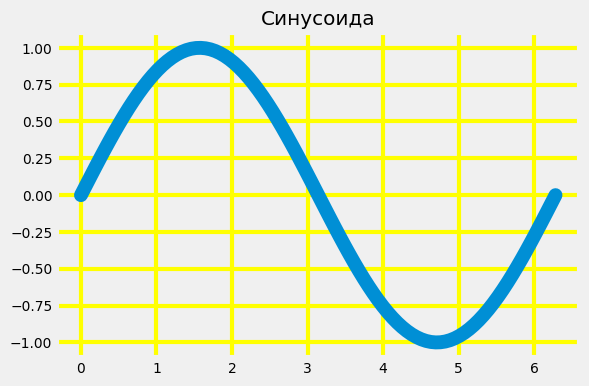

In [108]:
from importlib import reload
mpl = reload(mpl)

mpl.style.use("fivethirtyeight")
#mpl.style.use("default")

mpl.rcParams.update({
    "figure.figsize"  : (6, 4),
    "font.size"       : 10,
    "grid.color"      : "yellow",
    "lines.linewidth" : 10,
    "lines.solid_capstyle" : "round",
    "grid.linewidth"  : 3
})

x = np.linspace(0, 2 * np.pi, 100)
plt.title("Синусоида")
plt.plot(x, np.sin(x));

In [109]:
mpl.style.use("default")

## Примеры

### Простой пример

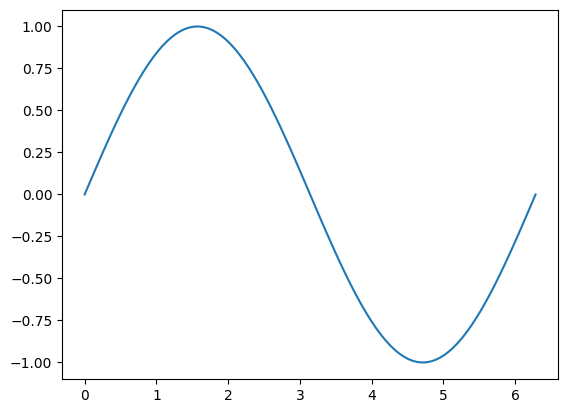

In [110]:
fig = plt.figure()
ax = fig.subplots()
ax.plot(x, np.sin(x));

### Фигура с одной Axes и несколькими графиками

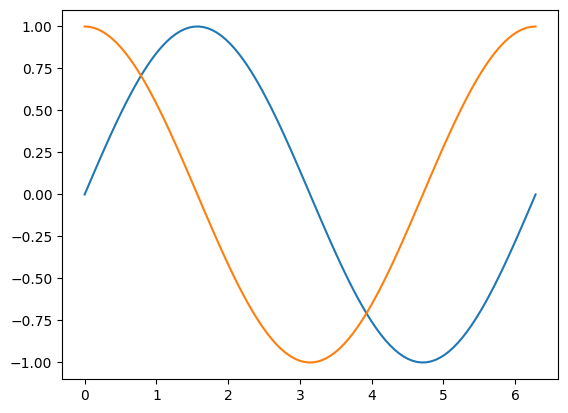

In [29]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x));

### Фигура с несколькими графиками

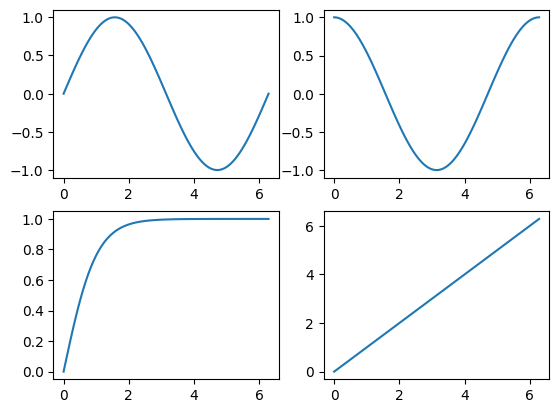

In [115]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, np.sin(x))
axs[0, 1].plot(x, np.cos(x))
axs[1, 0].plot(x, np.tanh(x))
axs[1, 1].plot(x, x);

### Фигура с мозаикой из Axes

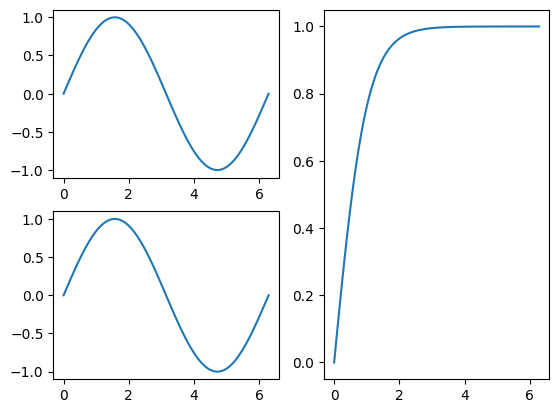

In [117]:
fig, axdict = plt.subplot_mosaic(
    [["top", "right"],
     ["bot", "right"]]
)
axdict["top"].plot(x, np.sin(x))
axdict["bot"].plot(x, np.sin(x))
axdict["right"].plot(x, np.tanh(x));

### Фигура с одной Axes и несколькими графиками с разными y-осями

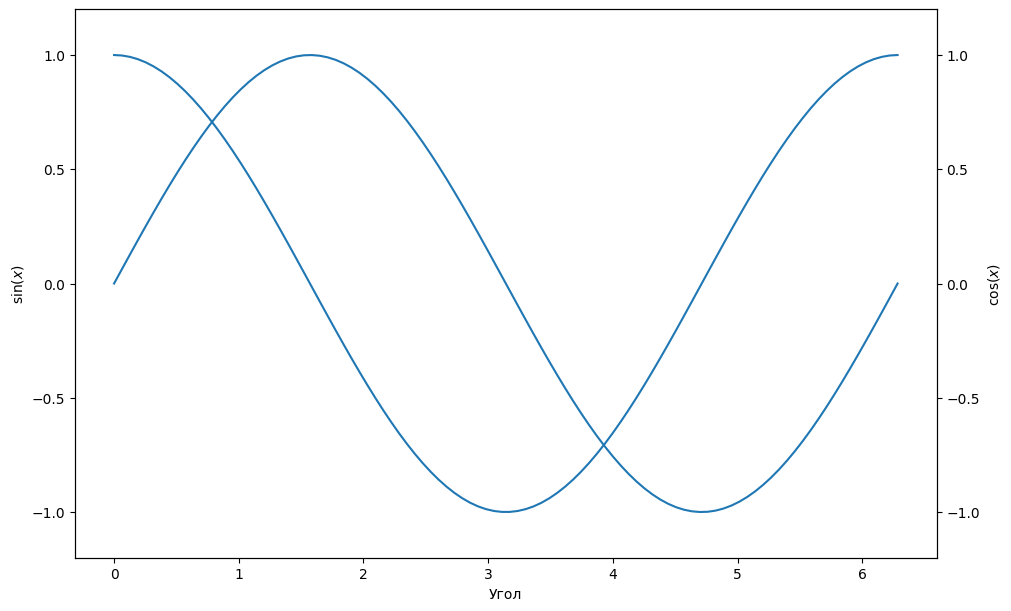

In [126]:
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
fig, ax1 = plt.subplots(figsize = (10, 6), facecolor = None, layout = "constrained")

ax1.set(xlabel="Угол", ylabel="$\sin(x)$")
ax1.set(ylim = (-1.2, 1.2))

ax2 = ax1.twinx()
ax2.set(ylim = (-1.2, 1.2), ylabel="$\cos(x)$")

ax1.plot(x, y1, label="sin")
ax2.plot(x, y2, label="cos");

### Совмещение изображений в разных фильтрах (M57)

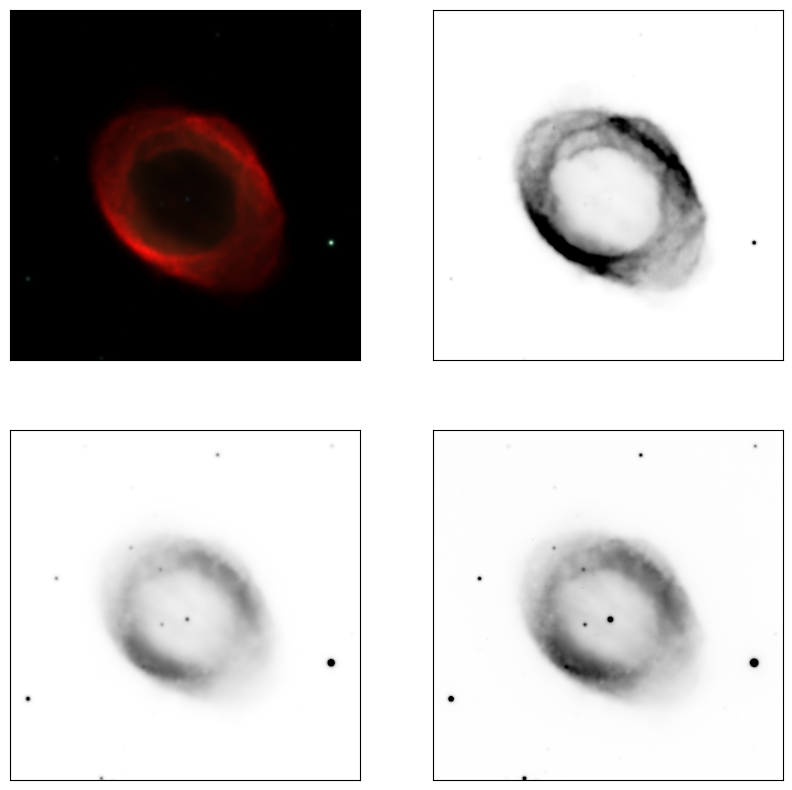

In [130]:
fits_v = fits.open("data/M57/Group1-V.fit")
fits_b = fits.open("data/M57/Group1-B.fit")
fits_ha = fits.open("data/M57/Group1-Hal.fit")

def rgbnorm(d, dmin):
    dmax = np.max(d)
    d = (d - dmin) / (dmax - dmin)
    d[d < 0] = 0
    return d

slicetup = (slice(700, 1600), slice(700, 1600))
d_v = fits_v[0].data[slicetup]
d_b = fits_b[0].data[slicetup]
d_ha = fits_ha[0].data[slicetup]

data_v  = rgbnorm(d_v, 10000)
data_b  = rgbnorm(d_b, 10000)
data_ha = rgbnorm(d_ha, 10000)
data_z  = np.zeros(data_v.shape)

data = np.stack([data_ha, data_v, data_b], axis = -1)

plt.style.use("default")
fig = plt.figure(figsize=(10, 10))
ax = fig.subplots(2, 2)
plt.setp(ax, xticks = [], yticks = [])

ax[0, 0].imshow(data, label = "RGB")
ax[0, 1].imshow(d_ha, label = "HA", vmin = 10000, vmax = 15000, cmap="Greys")
ax[1, 0].imshow(d_v, label = "V", vmin = 10000, vmax = 15000, cmap="Greys")
ax[1, 1].imshow(d_b, label = "B", vmin = 10000, vmax = 15000, cmap="Greys");

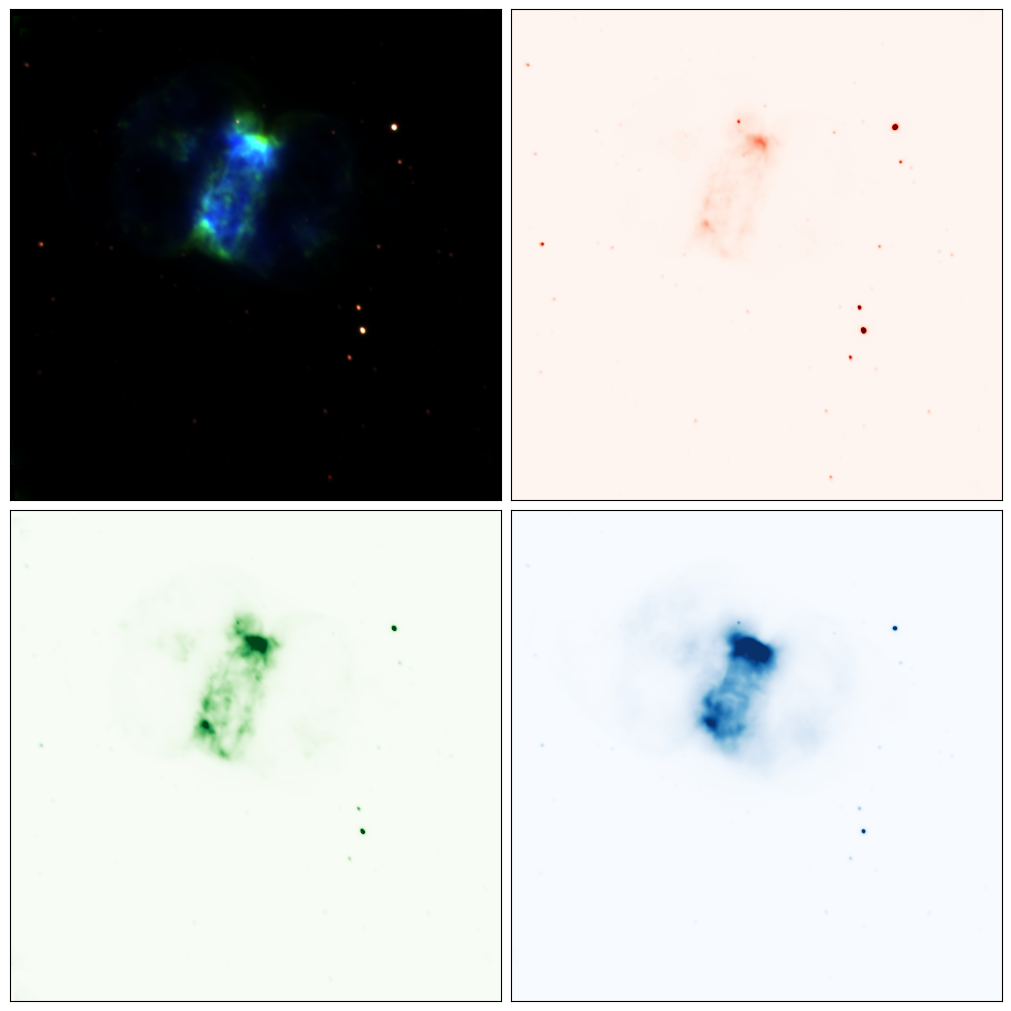

In [131]:
fits_r = fits.open("data/M76/M76_6717.fits")
fits_g = fits.open("data/M76/M76_6583.fits")
fits_b = fits.open("data/M76/M76_5007.fits")

def rgbnorm(d, dmin, dmax):
    #dmax = np.max(d)
    d = (d - dmin) / (dmax - dmin)
    d[d < 0] = 0
    d[d > 1] = 1.0
    return d

d_r = fits_r[0].data
d_g = fits_g[0].data
d_b = fits_b[0].data

data_r = rgbnorm(d_r, 0, 7)
data_g = rgbnorm(d_g, 0, 7)
data_b = rgbnorm(d_b, 0, 7)

data = np.stack([data_r, data_g, data_b], axis = -1)

plt.style.use("default")
fig = plt.figure(figsize=(10, 10), layout = "constrained")
ax = fig.subplots(2, 2)
plt.setp(ax, xticks = [], yticks = [])

ax[0, 0].imshow(data, label = "RGB")
ax[0, 1].imshow(d_r, label = "R", vmin = 0, vmax = 7, cmap="Reds")
ax[1, 0].imshow(d_g, label = "G", vmin = 0, vmax = 7, cmap="Greens")
ax[1, 1].imshow(d_b, label = "B", vmin = 0, vmax = 7, cmap="Blues");

### imshow_norm (astropy)

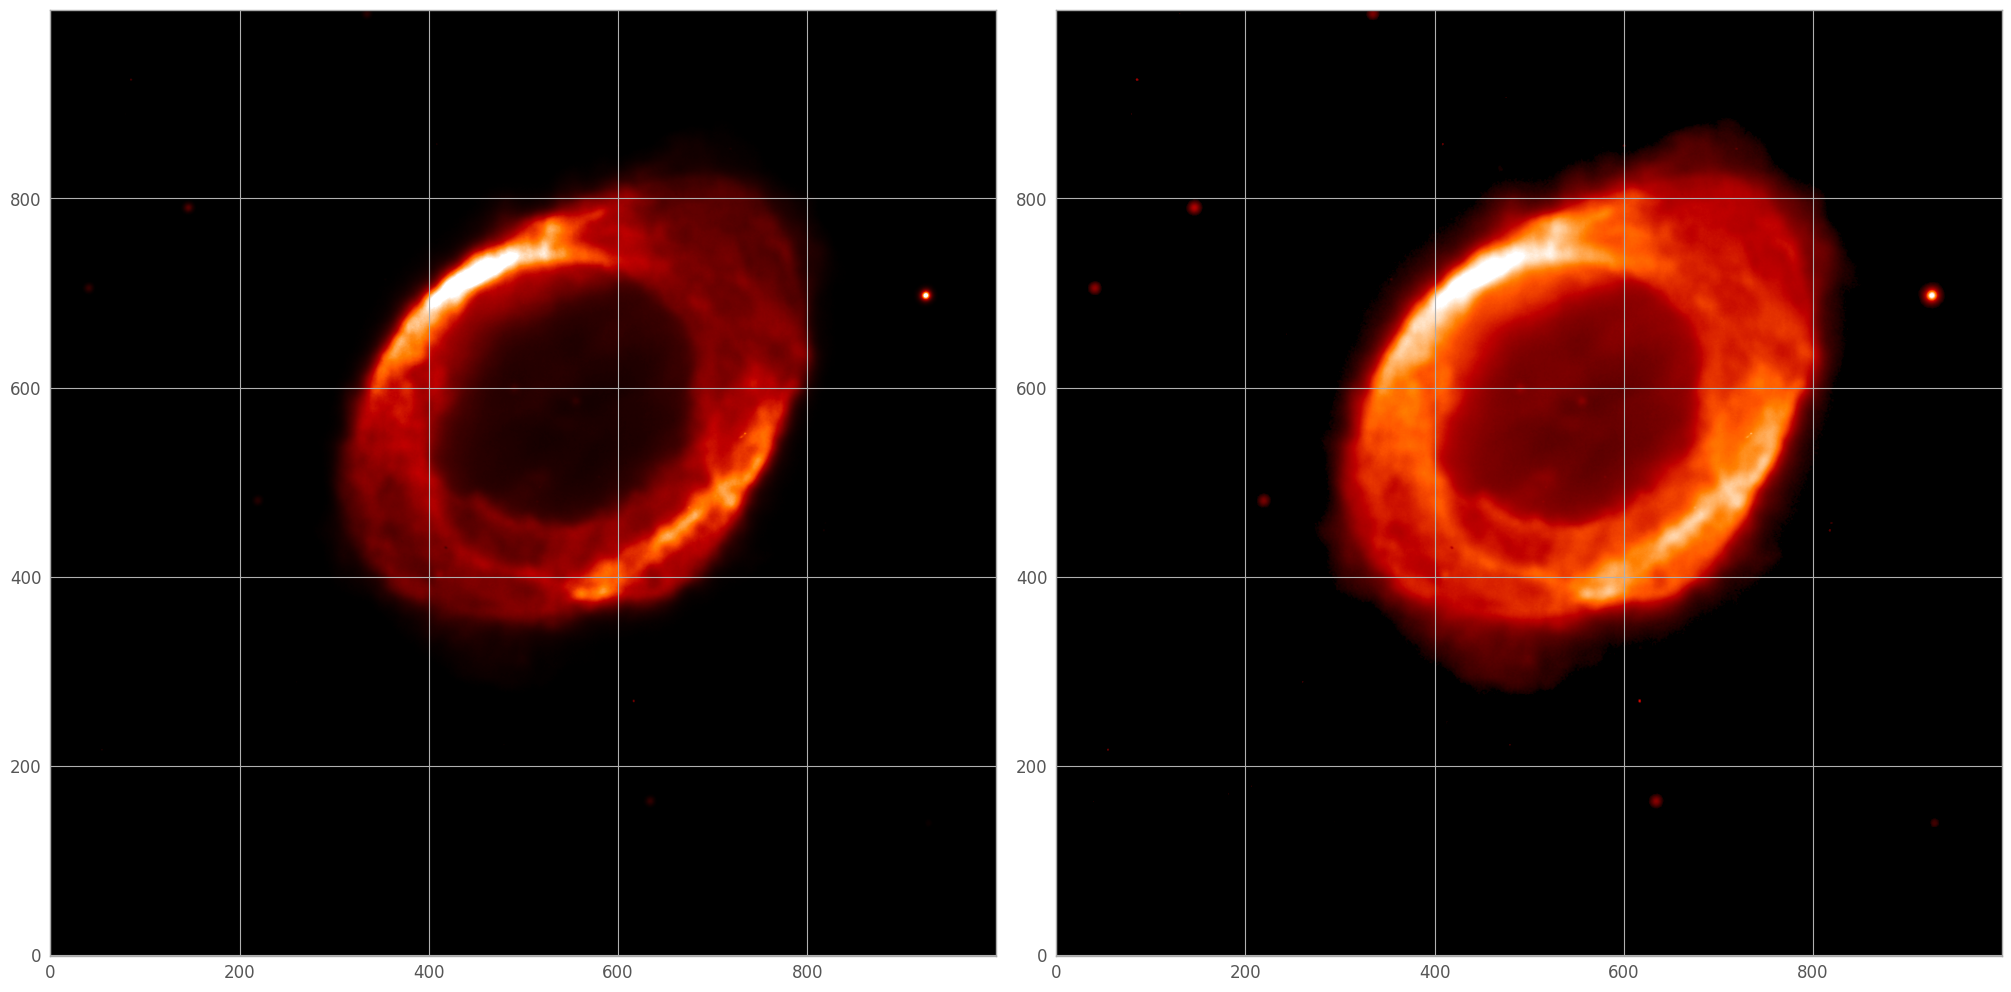

In [133]:
from astropy.visualization.mpl_normalize import (imshow_norm, MinMaxInterval, LinearStretch, SqrtStretch)
from astropy.visualization import astropy_mpl_style

mpl.style.use(astropy_mpl_style)

with fits.open("data/M57/Group1-Hal.fit") as fd: 
    d = fd[0].data[600:1600, 600:1600]

fig, ax = plt.subplots(1, 2, figsize=(20,10), layout = "constrained")
imshow_norm(d, ax[0], origin="lower", vmin = 10000, vmax = 17000, stretch = LinearStretch())
imshow_norm(d, ax[1], origin="lower", vmin = 10000, vmax = 17000, stretch = SqrtStretch());

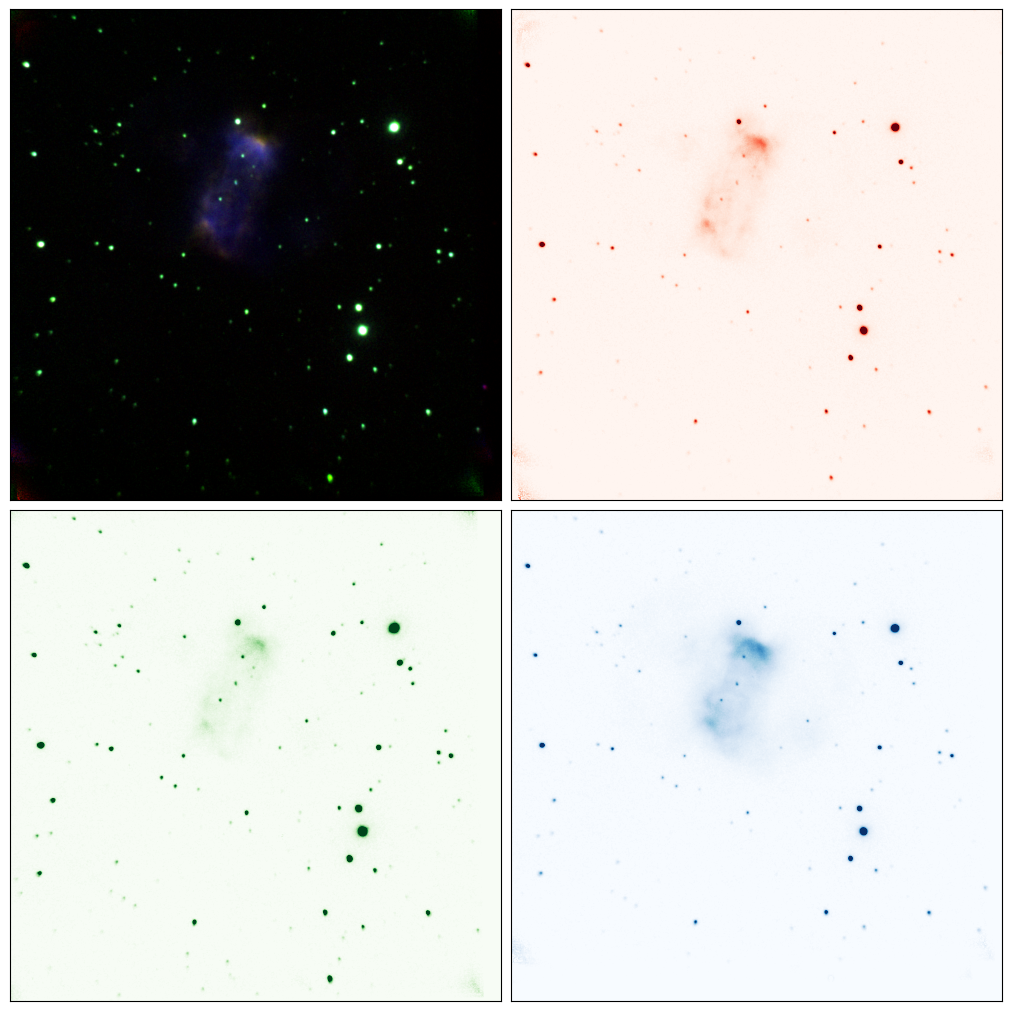

In [36]:
fits_r = fits.open("data/M76/M76_KGO_cont12.fits")
fits_g = fits.open("data/M76/M76_KGO_cont34.fits")
fits_b = fits.open("data/M76/M76_KGO_cont56.fits")

def rgbnorm(d, dmin, dmax):
    d = (d - dmin) / (dmax - dmin)
    d[d < 0] = 0
    d[d > 1] = 1.0
    return d

d_r = fits_r[0].data
d_g = fits_g[0].data
d_b = fits_b[0].data

data_r = rgbnorm(d_r, 0, 0.5)
data_g = rgbnorm(d_g, 0, 0.5)
data_b = rgbnorm(d_b, 0, 0.5)

data = np.stack([data_r, data_g, data_b], axis = -1)

plt.style.use("default")
fig = plt.figure(figsize=(10, 10), layout = "constrained")
ax = fig.subplots(2, 2)
plt.setp(ax, xticks = [], yticks = [])

ax[0, 0].imshow(data, label = "RGB")
ax[0, 1].imshow(d_r, label = "R", vmin = 0, vmax = 0.5, cmap="Reds")
ax[1, 0].imshow(d_g, label = "G", vmin = 0, vmax = 0.5, cmap="Greens")
ax[1, 1].imshow(d_b, label = "B", vmin = 0, vmax = 0.5, cmap="Blues");

## Выводы